In [2]:
import os
execfile(os.environ['PYTHONSTARTUP'])
execfile(STARTUP_IG2018)
%matplotlib inline

In [3]:
if __name__ == '__main__':

    execfile(os.environ['PYTHONSTARTUP'])
    execfile(STARTUP_IG2018)

    %matplotlib inline

In [4]:
import sys, imp

In [5]:
def normalize_time(time):
    """
    returns a time vector from 0 to 1 of the length of time
        and the time step dt in dimentional units
    """
    time=np.copy(time)
    dt=np.diff(time).mean()#G.dt_periodogram
    time=(time-time[0])/dt#np.arange(0,time.size, 1)
    return (time)/(time[-1]) , dt


In [6]:
def gaussian(x,x0,sigma):
  return np.exp(-np.power((x - x0)/sigma, 2.)/2.)


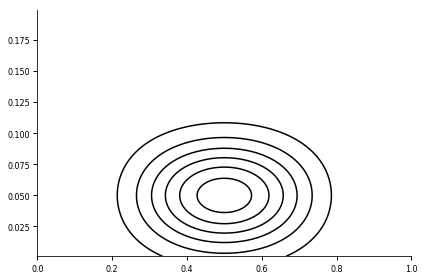

In [20]:
#%% generate some data_ano
if __name__ == '__main__':

    f=np.arange(1/1000.0, .2, 0.001)
    time=np.arange(0, 1, 0.001)

    tt, ff = np.meshgrid(time, f)
    fake_data=  np.sin(tt*np.pi)**4 * gaussian( ff, .05, 0.03)

    plt.contour(tt, ff, fake_data, colors='k')

In [8]:
# %% basic functions
def gamma_time_normlized_amp(time, gammapar=2, loc=.2, scale=0.1):
    from scipy.stats import gamma
    """
    configured for normalized time scale (0, 1)
    gammapar > 1
    time > 0
    loc is position 0 ..1
    scale  >0 .. \approx 0.3
    """
    gamma_mod=gamma(gammapar, loc = loc, scale = scale).pdf(time)
    return  gamma_mod/gamma_mod.max()

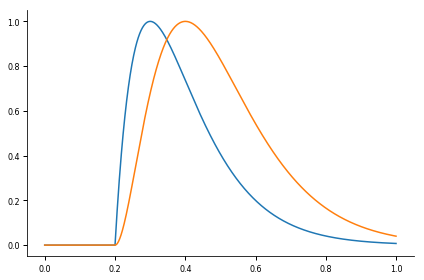

In [31]:
if __name__ == '__main__':
    plt.plot(time, gamma_time_normlized_amp(time))
    plt.plot(time, gamma_time_normlized_amp(time, gammapar=3, loc=.2, scale=0.1) )


In [23]:
# %% JONSWAP

def JONSWAP_bulk(f, floc=0.04, famp=1e-2,  gamma=3.3, peak_std=1e-1):
    """
    see Ocean Surface waves - S. R. Massel eq.3.69 and eq.3.81

    """
    B=0.74 #
    g=9.81
    w=f*2*np.pi
    wp=floc*2*np.pi
    stretch=5/4

    #peak_std=1e-01 #0.00555
    #scale_std=1e-2
    alpha=famp
    #stretch=5/4

    delta=np.exp(-(w-wp)**2 / ( 2*peak_std**2 *wp**2 ) )
    peak_factor=gamma**delta
    return alpha * w**(-5) * np.exp(-stretch*  (w/wp)**-4)*peak_factor # units of m^2 / Hz
    #np.exp(-B *(g/(w*U))**4)

In [24]:
def pierson_moskowitz_default(f, U):
    """
    see Ocean Surface waves - S. R. Massel eq.3.79 and eq.3.80

    """

    g=9.81
    wp=0.879*g / U
    w=2.*np.pi*f
    sigma=0.04 *g / wp**2.0
    alpha=5.0* (wp**2.0 *sigma / g)**2.0

    return  alpha * w**(-5.0) * g**2.0 *np.exp(-5./4.0 * (w/wp)**-4)#

In [25]:
def pierson_moskowitz_fetch_limit(f, X,  U):
    """
    see Ocean Surface waves - S. R. Massel eq.3.81 - eq.3.84

    """
    g=9.81 # m s*-2
    w=2.*np.pi*f # rad/sec

    alpha=0.076*(g *X /U**2)**(-0.22) #non-dimentional
    wp= 7.* np.pi * (g /U) * (g * X /U**2)**(-0.33)
    print('wp='+str(wp))

    sigma_p=0.07
    sigma_pp=0.09
    sigma= np.array([[sigma_p if i else sigma_pp][0]  for i in list(w<=wp)  ])

    gamma=3.3
    delta=np.exp(-(w-wp)**2 / ( 2.*sigma**2. *wp**2. ) )
    peak_factor=gamma**delta

    return alpha * g**2.0 * w**(-5.) * np.exp(-5./4.0 *  (w/wp)**-4)# Hz**-5 m**2 /s**4  = m**2 sec

In [32]:
def JONSWAP_default(f, X=5e5, U=15, gamma=3.3):
    """
    see Ocean Surface waves - S. R. Massel eq.3.81 - eq.3.84
    inputs:
    X         fetch lenght in meters about 5e5,
    U          wind speed in m/s about 15 m/s
    gamma is defined in the JONSWAP spectrum as 3.3. However, The JONSWAP spectrum is a psectrum for a fully deleoped sea, and likely not observed in a remote location.
    varying gamma to less then its JONSWAP value will mimic the attenuation of the peak with travel time to the limit of gamma=1, which is the PM spectrums
    """
    g=9.81 # m s*-2
    w=2.*np.pi*f # rad/sec

    alpha=0.076*(g *X /U**2)**(-0.22) #non-dimentional
    wp= 7.* np.pi * (g /U) * (g * X /U**2)**(-0.33)
    #print('wp='+str(wp))
    #print('nu='+str(wp*U/(g)))

    sigma_p=0.07
    sigma_pp=0.09
    sigma= np.array([[sigma_p if i else sigma_pp][0]  for i in list(w<=wp)  ])

    gamma=3.3
    delta=np.exp(-(w-wp)**2 / ( 2.*sigma**2. *wp**2. ) )
    peak_factor=gamma**delta

    return alpha * g**2.0 * w**(-5.) * np.exp(-5./4.0 *  (w/wp)**-4)*peak_factor # Hz**-5 m**2 /s**4  = m**2 sec  ?


In [38]:
g=9.81

def X_tilde(X, U10):
    return g*X/U10**2

def alpha(f_max, U10):
    return 0.033*(f_max*U10/g)**0.67

def f_max(U10, X):
    return 3.5*g/U10*X_tilde(X,U10)**(-0.33)

wp=0.532273712527


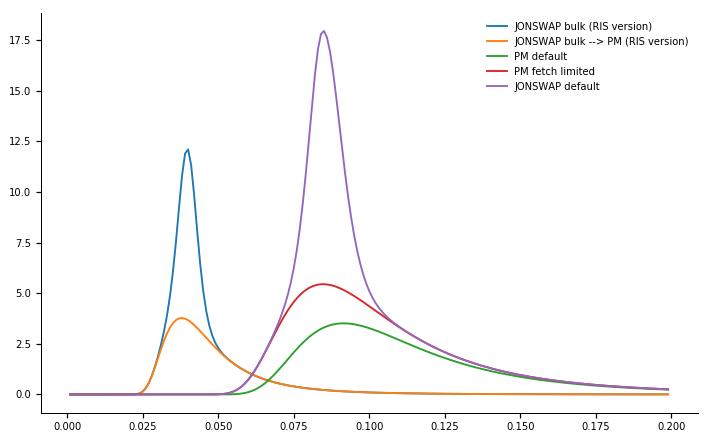

In [27]:
if __name__ == '__main__':

    M.figure_axis_xy()
    plt.plot(f, JONSWAP_bulk(f, gamma=3.3), label='JONSWAP bulk (RIS version)')
    plt.plot(f, JONSWAP_bulk(f, gamma=1), label='JONSWAP bulk --> PM (RIS version)')

    plt.plot(f, pierson_moskowitz_default(f, 15),  label='PM default')
    plt.plot(f, pierson_moskowitz_fetch_limit(f, 5e5,  15), label='PM fetch limited')
    plt.plot(f, JONSWAP_default(f, 5e5,  15), label='JONSWAP default')
    plt.legend()

In [56]:
def gamma_time_JONSWAO_default(time, f,
                   slope_t, intersectT,
                   tgammapar, tscale,
                    f_max=0.04,
                    U10= 20,
                    gamma_peak=3.3,
                    amplitude=1,
                    plot=False):

    """
    This method calculated a 2D shaped function given the parameters:
    inputs:

    time        normalized time [0, 1] np.array
    f           frequency in the swell band, np.array,

    slope_t     slope of the "dispersed peak frequencies" df/dt [Hz/ normalized time]
    intersectT  intersect of that line in units of normalized time

    tgammapar   gamma parameter of the gamma function in time
    tscale      scaling parameter of the gamma function

    f_max       =0.04, location of the peak frequency on the JONSWAP spectrum
    U10           Wind speed that generates the waves
    gamma_peak  =3.3,  gamma peak parameter of the JONSWAP spectrum

    amplitude   amplitude of the whole function.  if =1 , peak amplitude corresponds to JONSWAPs values

    plot        True, False. Simple plot of the output function

    return:
                2d function with the shape of [time,freq]
    """

    #intersectf=intersect-intersect/slopet
    intersectF=-intersectT*slope_t
    pfreq=time*slope_t+intersectF
    #print('intersect F=' + str(intersectF))

    #intersectf=intersect#-intersect/slope
    slopeF=1/slope_t
    pfreq_forgamma=f*slopeF+intersectT

    #rint(pfreq.shape)
    tt, line=np.meshgrid(time, pfreq_forgamma)
    #print(line)
    #print(tt)
    func_t= gamma_time_normlized_amp(tt, gammapar=tgammapar, loc=line, scale=tscale)
    #func_t_temp= (tamp*np.exp(- (time-t_center )**4 / tsigma ))
    #print(func_t.shape)

    """ Define X(f_max and U) here """
    def X(f_max, U10):
        return 3.5**3*g**2/U10/f_max**3
    

    func_freq_temp= JONSWAP_default(f, X=X(f_max,U10),  U=U10, gamma=gamma_peak)

    #func_freq_temp=   (famp*np.exp(- (f-fcenter)**2 / fsigma ))
    tt, func_freq= np.meshgrid( time, func_freq_temp)

    if plot:
        F=M.figure_axis_xy(8,10)
        plt.subplot(3, 1, 1)
        plt.contourf(tt, ff, func_t)
        plt.plot(time, pfreq)
        plt.ylim(f.min(), f.max())


        plt.subplot(3, 1, 2)
        #plt.plot(f, func_freq.mean(1))
        plt.contourf(tt, ff,func_freq)

        plt.subplot(3, 1, 3)
        plt.contourf(tt, ff, func_t * func_freq)
        #plt.ylim(0.04,0.08)
        plt.grid()

    return (func_t * func_freq).T




intersect F=-0.3


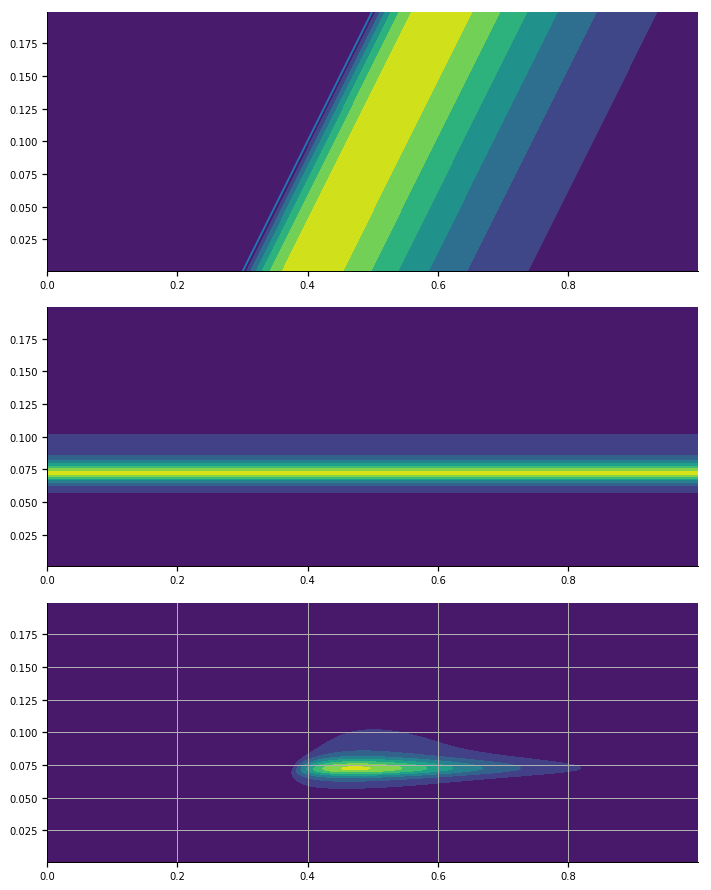

In [57]:
if __name__ == '__main__':
    slope0= 1
    intersect0=.3
    tgammapar0=2
    tscale0=.1

    model_func =gamma_time_JONSWAO_default(time, f, slope0, intersect0, tgammapar0, tscale0, plot=True)